# Plotting Lab

In the `datasets/` folder in this notebook you will find two datasets:

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 
- `wine_quality.csv` -- a dataset comparing chemical qualities of red and white wine and user-rated quality scores (on a 10 point scale)

Your task is to use Matplotlib and Seaborn to create two, high-quality plots, one from each of these two datasets. Your deliverable for this lab is to share your plots in your market's slack channel at the end of the day. 

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases
    - Consider checking in with your colleagues, classmates, and teachers
  - At first glance, are there columns that you think might have an interesting relationship
2. Begin plotting:
  - If a variable of interest is encoded as a string, do some feature extraction / transformation to turn it into numeric values
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into a bivariate relationship
3. Refine plots:
  - Try different plotting types / plotting options to create an accurate and interesting plot
  - Remember to include titles, axes labels, etc.
  - Does your plot have a story? What should a reader take away from your plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Salary

In [2]:
salary = pd.read_csv('datasets/salary.csv')
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


# Wine Quality

In [3]:
wine = pd.read_csv('datasets/wine_quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Shape of Salary Dataset

In [4]:
a,b = salary.shape
print (str(a) + ' rows and ' + str(b) + ' columns' )

52 rows and 6 columns


# Shape of Wine Dataset

In [5]:
a,b = wine.shape
print (str(a) + ' rows and ' + str(b) + ' columns' )

6497 rows and 13 columns


# Missing Data? 

### Salary Dataset

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
sx    52 non-null object
rk    52 non-null object
yr    52 non-null int64
dg    52 non-null object
yd    52 non-null int64
sl    52 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


In [7]:
salary.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

## Wine Dataset

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Based on the initial review there are no null values in the dataset

In [10]:
salary.columns

Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl'], dtype='object')

In [11]:
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [12]:
salary.rename(columns = {'sx': 'Sex', 'rk': 'Teacher Type', 'dg': 'Degree', 'sl': 'Salary'}, inplace = True)

In [13]:
salary.head()

,Sex,Teacher Type,yr,Degree,yd,Salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


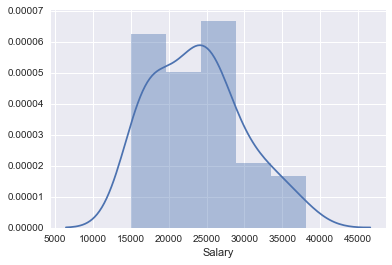

In [14]:
sns.distplot(salary['Salary'])

In [15]:
salary.head()

,Sex,Teacher Type,yr,Degree,yd,Salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [16]:
salary.groupby(salary['Sex'])['Salary'].max()

Sex
female    38045
male      36350
Name: Salary, dtype: int64

In [17]:
salary.groupby(salary['Sex'])['Salary'].min()

Sex
female    15000
male      16094
Name: Salary, dtype: int64

In [18]:
salary['Degree'].value_counts()

doctorate    34
masters      18
Name: Degree, dtype: int64

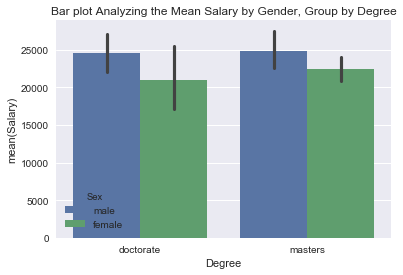

In [19]:
sns.barplot(x='Degree', y='Salary', hue='Sex', data=salary)
sns.set_style("whitegrid")
sns.plt.title('Bar plot Analyzing the Mean Salary by Gender, Group by Degree')

In [20]:
salary.head()

,Sex,Teacher Type,yr,Degree,yd,Salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


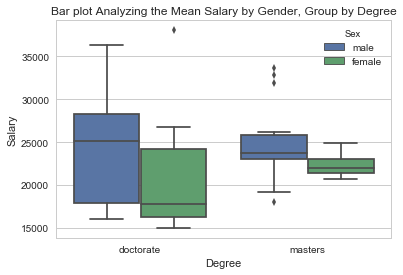

In [21]:
sns.boxplot(x='Degree', y='Salary', hue='Sex', data=salary)
sns.set_style("whitegrid")
sns.plt.title('Bar plot Analyzing the Mean Salary by Gender, Group by Degree')

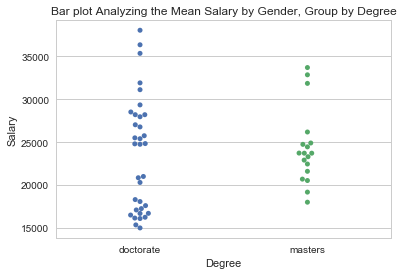

In [22]:
sns.swarmplot(x='Degree', y='Salary', data=salary)
sns.set_style("whitegrid")
sns.plt.title('Bar plot Analyzing the Mean Salary by Gender, Group by Degree')

In [23]:
salary.head()

,Sex,Teacher Type,yr,Degree,yd,Salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


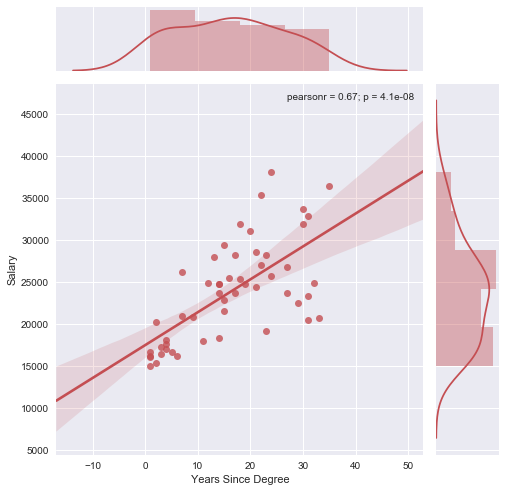

In [24]:
import seaborn as sns
salary = pd.read_csv('datasets/salary.csv')
salary.rename(columns = {'sx': 'Sex', 'rk': 'Teacher Type', 'dg': 'Degree', 'sl': 'Salary', 'yd': 'Years Since Degree'}, inplace = True)
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("Years Since Degree", "Salary", data=salary, kind="reg",
                  color="r", size=7)

In [25]:
salary.head()

,Sex,Teacher Type,yr,Degree,Years Since Degree,Salary
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


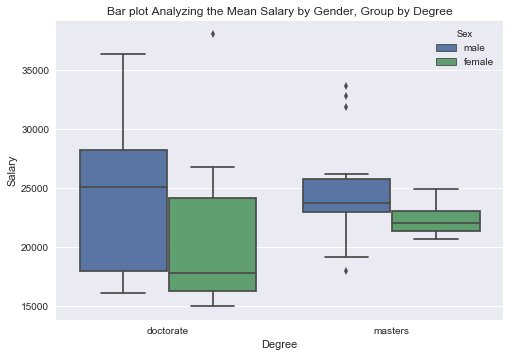

In [26]:
salary = pd.read_csv('datasets/salary.csv')
salary.rename(columns = {'sx': 'Sex', 'rk': 'Teacher Type', 'dg': 'Degree', 'sl': 'Salary'}, inplace = True)
sns.boxplot(x='Degree', y='Salary', hue='Sex', data=salary)
sns.set_style("whitegrid")
sns.plt.title('Bar plot Analyzing the Mean Salary by Gender, Group by Degree')

In [27]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


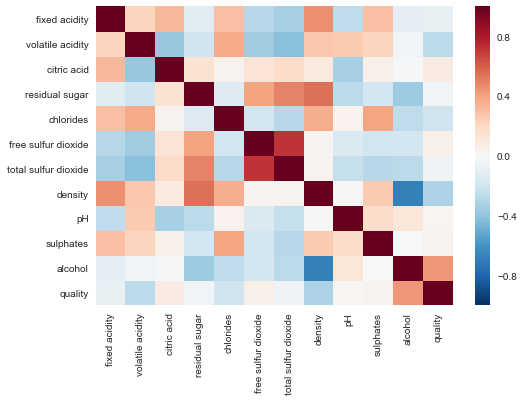

In [28]:
corr_df = wine[['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide'
                 ,'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol', 'quality']].corr()
sns.heatmap(corr_df)


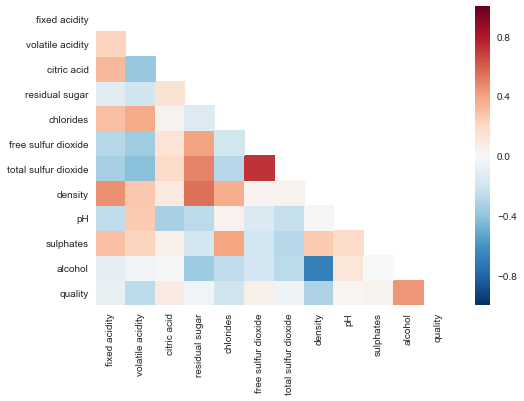

In [29]:
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] =True
sns.heatmap(corr_df, mask=mask)

(0, 12)

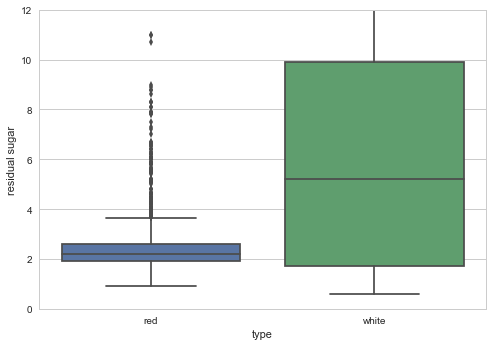

In [30]:
ax = sns.boxplot(x='type', y='residual sugar',  data=wine)
ax.set_ylim([0, 12])

In [31]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


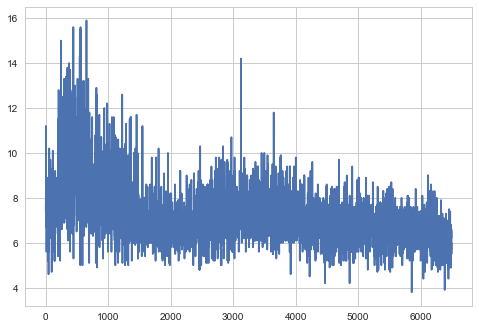

In [33]:
plt.plot(wine['fixed acidity'])

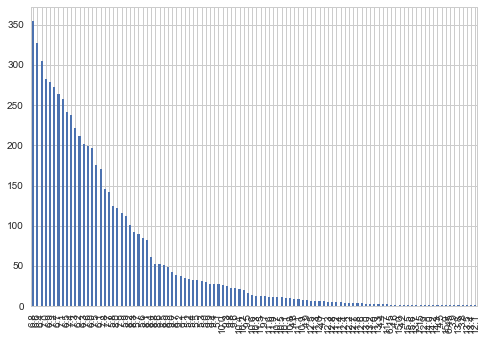

In [40]:
wine['fixed acidity'].value_counts().plot(kind='bar')

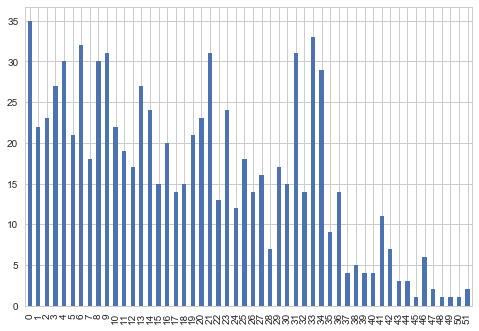

In [45]:
salary['yd'].plot(kind='bar')

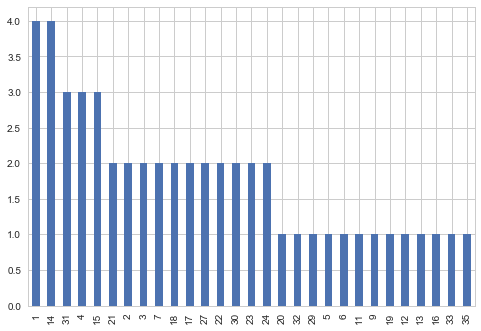

In [47]:
salary['yd'].value_counts().plot(kind='bar')

In [50]:
salary[salary['yd']==1]

,Sex,Teacher Type,yr,Degree,yd,Salary
45,male,assistant,2,doctorate,1,16094
48,male,assistant,1,doctorate,1,16244
49,female,assistant,1,doctorate,1,16686
50,female,assistant,1,doctorate,1,15000
